In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

np.random.seed(42)

import tensorflow as tf 
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
 

In [24]:
mass = pd.read_pickle('./data/03_dummy_df.pickle') 
sent = pd.read_pickle('./data/03_mass_notes_sentiment_analysis.pickle')

In [25]:
mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions,start_date,end_date,target
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,1,0,0,1,0,0,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]"
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,0,1,0,0,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]"
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,0,1,0,0,0,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]"
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,1,0,0,0,0,0,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]"
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,0,1,0,0,0,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]"


In [26]:
mass.shape

(15225, 228)

In [27]:
sent.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,price increases_tax_policy,removal_of_politician,social_restrictions,start_date,end_date,notes_clean,neg,neu,pos,compound
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,0,0,0,1990-01-15,1990-01-15,canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,0,1990-06-25,1990-06-25,protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,0,1990-07-01,1990-07-01,"the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,0,0,1990-07-12,1990-09-06,canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,0,1990-08-14,1990-08-15,protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [28]:
sent = sent[['notes_clean', 'neg', 'neu', 'pos', 'compound']]
sent.head()

,notes_clean,neg,neu,pos,compound
0,canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,"the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [29]:
sent.shape

(15179, 5)

In [30]:
mass.dropna(subset=['notes'], inplace=True)
mass.shape

(15179, 228)

In [31]:
mass = pd.concat([mass, sent], axis=1, join='inner')
mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,removal_of_politician,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,0,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]","the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,0,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [101]:
mass['protest_duration'] = mass['end_date'] - mass['start_date']
mass['protest_duration'] = mass['protest_duration'].dt.days + 1
mass['protest_duration']

0         1
1         1
2         1
3        57
4         2
         ..
15220     3
15221    26
15222     1
15223     1
15224     1
Name: protest_duration, Length: 15179, dtype: int64

In [102]:
# save 
mass.to_csv('./data/mass_mobile.csv')

## Multilabel Classification using Neural Network 

In [85]:
X = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
       'end_date', 'target'])
#y = mass['target']
y = np.array(mass[['arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings']])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [87]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [88]:
n_input = Z_train.shape[1]
n_output = y.shape[1]
print(f'Number of inputs: {Z_train.shape[1]}')
print(f'Number of outputs: {y.shape[1]}')

Number of inputs: 218
Number of outputs: 7


In [89]:
model = Sequential()
model.add(Dense(n_input, input_dim=n_input, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(n_output, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(Z_train, y_train)

356/356 [==============================] - 0s 606us/step - loss: 0.2930 - accuracy: 0.6492


In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 218)               47742     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1533      
Total params: 49,275
Trainable params: 49,275
Non-trainable params: 0
_________________________________________________________________


In [91]:
pred = model.predict(Z_test)
y_pred = pred.round()
y_pred.shape

(3795, 7)

In [92]:
metrics.r2_score(y_test, y_pred)


0.9748167710751947

In [93]:
metrics.accuracy_score(y_test, y_pred)

0.9839262187088273

In [94]:
model.evaluate(Z_test, y_test)

119/119 [==============================] - 0s 390us/step - loss: 0.0265 - accuracy: 0.8875


[0.026542354375123978, 0.887483537197113]

In [95]:
history = model.fit(Z_train, 
                   y_train, 
                   validation_data=(Z_test, y_test), 
                   epochs=50, 
                   batch_size=None, 
                   verbose=2)

Epoch 1/50
356/356 - 0s - loss: 0.0127 - accuracy: 0.8770 - val_loss: 0.0092 - val_accuracy: 0.8801
Epoch 2/50
356/356 - 0s - loss: 0.0041 - accuracy: 0.8795 - val_loss: 0.0057 - val_accuracy: 0.8746
Epoch 3/50
356/356 - 0s - loss: 0.0023 - accuracy: 0.8771 - val_loss: 0.0042 - val_accuracy: 0.8688
Epoch 4/50
356/356 - 0s - loss: 0.0014 - accuracy: 0.8829 - val_loss: 0.0031 - val_accuracy: 0.8743
Epoch 5/50
356/356 - 0s - loss: 0.0010 - accuracy: 0.8756 - val_loss: 0.0028 - val_accuracy: 0.8551
Epoch 6/50
356/356 - 0s - loss: 7.6812e-04 - accuracy: 0.8754 - val_loss: 0.0024 - val_accuracy: 0.8711
Epoch 7/50
356/356 - 0s - loss: 5.5213e-04 - accuracy: 0.8782 - val_loss: 0.0023 - val_accuracy: 0.8680
Epoch 8/50
356/356 - 0s - loss: 3.1178e-04 - accuracy: 0.8728 - val_loss: 0.0021 - val_accuracy: 0.8980
Epoch 9/50
356/356 - 0s - loss: 3.3864e-04 - accuracy: 0.8745 - val_loss: 0.0019 - val_accuracy: 0.8709
Epoch 10/50
356/356 - 0s - loss: 1.6503e-04 - accuracy: 0.8739 - val_loss: 0.0018 - 

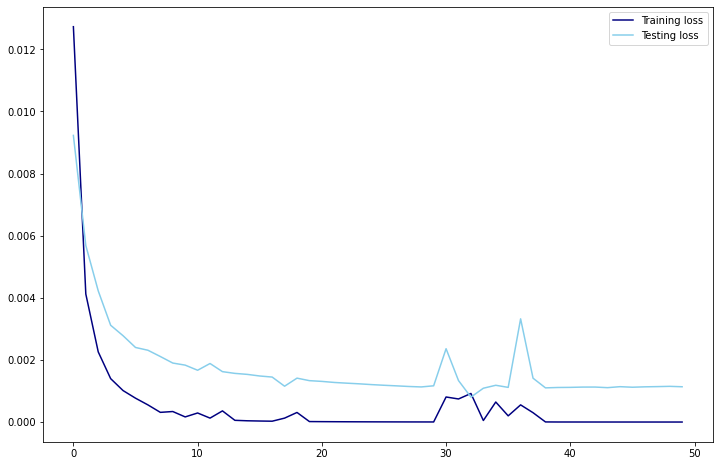

In [96]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();